In [43]:
# First, we need to install the graphviz package
!apt-get install graphviz
!pip install graphviz

import graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [75]:

# NFA Definition
nfa_dot = '''
digraph NFA {
    rankdir=LR;
    q0 [shape=circle, label="q0 (Start)"];
    q1 [shape=circle, label="q1 (Digits)"]; // Final state
    q2 [shape=circle, label="q2 (Decimal Point)"];
    q3 [shape=doublecircle, label="q3 (Fractional Part)"];
    q4 [shape=circle, label="q4 (Exponent)"];
    q5 [shape=circle, label="q5 (Exponent Sign)"];
    q6 [shape=doublecircle, label="q6 (Exponent Digits)"]; // Final state

    // Transitions
    q0 -> q1 [label="+ or -"];
    q0 -> q1 [label="ϵ"];
    q0 -> q1 [label="0-9"];
    q1 -> q1 [label="0-9"];
    q1 -> q2 [label="."]; // Move to decimal point
    q2 -> q3 [label="0-9"]; // Move to fractional part
    q3 -> q3 [label="0-9"]; // Continue in fractional part
    q3 -> q4 [label="e or E"]; // Move to exponent
    q4 -> q5 [label="+ or -"]; // Exponent sign
    q4 -> q6 [label="0-9"]; // Move to exponent digits
    q5 -> q6 [label="0-9"]; // Continue exponent digits
    q6 -> q6 [label="0-9"]; // Continue in exponent digits
}
'''

dfa_dot = '''
digraph DFA {
    rankdir=LR;
    q0 [shape=circle, label="q0 (Start)"];
    q1 [shape=circle, label="q1 (Optional Sign)"];
    q2 [shape=doublecircle, label="q2 (Integer)"]; // Final state
    q3 [shape=circle, label="q3 (Decimal Point)"];
    q4 [shape=doublecircle, label="q4 (Fractional Part)"]; // Final state
    q5 [shape=circle, label="q5 (Exponent)"];
    q6 [shape=circle, label="q6 (Exponent Sign)"];
    q7 [shape=circle, label="q7 (Exponent Digits)"];
    q8 [shape=doublecircle, label="q8 (Final Integer State)"]; // Final state without exponent

    // Transitions
    q0 -> q1 [label="+ or -"];
    q0 -> q2 [label="0-9"];
    q1 -> q2 [label="0-9"];
    q2 -> q2 [label="0-9"];
    q2 -> q3 [label="."]; // Move to decimal point
    q3 -> q4 [label="0-9"]; // Move to fractional part
    q4 -> q4 [label="0-9"]; // Continue in fractional part
    q4 -> q5 [label="e or E"]; // Move to exponent
    q5 -> q6 [label="+ or -"]; // Exponent sign
    q6 -> q7 [label="0-9"]; // Exponent digits
    q7 -> q8 [label="0-9"]; // Continue in exponent digits
    q8 -> q8 [label="0-9"];
}
'''

# Create NFA and DFA images
nfa_graph = graphviz.Source(nfa_dot)
dfa_graph = graphviz.Source(dfa_dot)

# Render the NFA and DFA
nfa_graph.render("NFA", format='png', cleanup=True)
dfa_graph.render("DFA", format='png', cleanup=True)




'DFA.png'

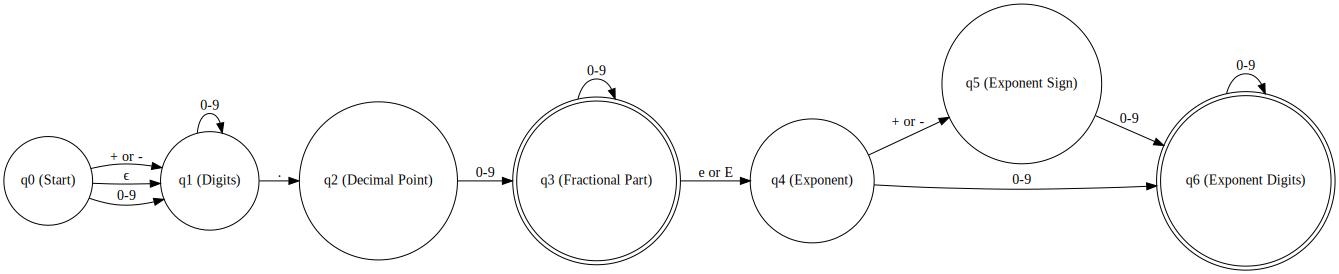

In [70]:
# Display the images
nfa_graph


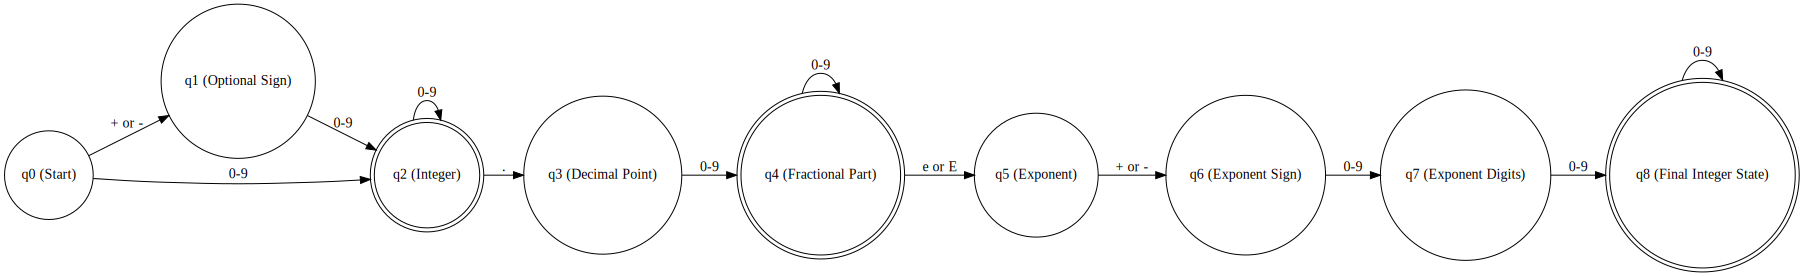

In [76]:
dfa_graph

In [71]:
from google.colab import files

# Download NFA and DFA images
files.download("NFA.png")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
files.download("DFA.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>